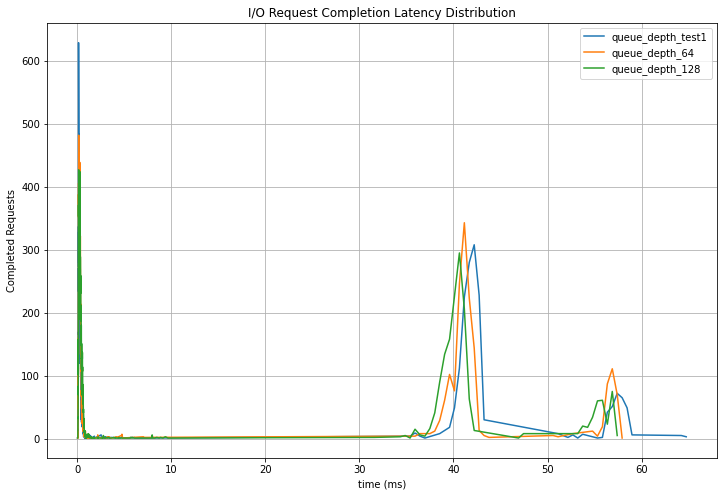

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import json
import os
import mplcursors

# Name your output files according to what you want in the legend for now

json_source_dir = r'/home/mplageman/autobench/output/azure_vm/home/mplageman/fio_output'

def extract_plot_points(json_file):
    with open(json_file, 'r') as source:
        jsondata = json.loads(source.read())
    x = []
    y = []
    for jobnum in range(0, len(jsondata['jobs'])):
        job = jsondata['jobs'][jobnum]
        completion_latency = job['write']['clat_ns']
        for completion_time, number_ios in completion_latency['bins'].items():
            x.append(int(completion_time)/1000000)
            y.append(int(number_ios))
    return x, y

fig, ax = plt.subplots(figsize=(12, 8))

for entry in os.scandir(json_source_dir):
    if (entry.path.endswith(".json")) and entry.is_file():
        x, y = extract_plot_points(os.path.join(json_source_dir, entry))
        label = os.path.splitext(entry.name)[0]
        if label.split('_')[0] != 'queue':
            continue
        ax.plot(x, y, label=os.path.splitext(entry.name)[0])

ax.set(xlabel='time (ms)', ylabel='Completed Requests',
       title='I/O Request Completion Latency Distribution')

ax.grid()
plt.legend()
mplcursors.cursor(hover=True)

#fig.savefig("test.png")

plt.show()